# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студентки гр. 0382 Деткова Анна и Рубежова Наталия. Вариант №11.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения
*__Средним значением последовательности__* называют отношение суммы ее значений к длине последовательности. <br><br>

*__Энергией (𝐸) последовательности__* называют сумму квадратов ее
значений <br><br>

*__Средней мощностью (𝑃) последовательности__* называют отношение её энергии к длине последовательности. <br><br>

Для детерминированной последовательности $x(n), n \in [0, N-1]$ они вычисляются *__по следующим формулам__*:

* Среднее значение:<br>
$M = \frac {1} {5N} \sum_{i=0}^{5N-1} {x(i)}$

* Энергия:<br>
$E = \sum_{i=0}^{5N-1} {x(i)}$;

* Средняя мощность последовательности:<br>
$P = \frac 1 {5N} \sum_{i=0}^{5N-1} {x(i)}$.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Вариант:

$N_{бр} = 11;\\
N = 30 + N_{бр} \mod 5 = 31;\\
a = (-1)^{N_{бр}}(0.8+0.005(N_{бр} \mod 20)) = -0.855;\\
C = 1 + N_{бр} \mod 5 = 2;\\
\hat {\omega_0} = \frac {\pi} {6 + N_{бр} \mod 5} = \frac \pi 7;\\
U = N_{бр} = 11;\\
n_0 = 3 + N_{бр} \mod 5 = 4;\\
n_{imp} = 5 + N_{бр} \mod 5 = 6;\\
B_1 = 1.5 + N_{бр} \mod 5 = 2.5;\\
B_2 = 5.7 - N_{бр} \mod 5 = 4.7;\\
B_3 = 2.2 + N_{бр} \mod 5 = 3.2;\\
\hat {\omega_1} = \frac {\pi} {4 + N_{бр} \mod 5} = \frac \pi 5;\\
\hat {\omega_2} = \frac {\pi} {8 + N_{бр} \mod 5} = \frac \pi 9;\\
\hat {\omega_3} = \frac {\pi} {16 + N_{бр} \mod 5} = \frac \pi {17};\\
a_1 = 1.5 - N_{бр} \mod 5 = 0.5;\\
a_2 = 0.7 + N_{бр} \mod 5 = 1.7;\\
a_3 = 1.4 + N_{бр} \mod 5 = 2.4$

In [ ]:
import math
import cmath
import matplotlib.pyplot as plt

In [ ]:
N = 31
a = -0.855
C = 2
w0 = math.pi/7
U = 11
n0 = 4
n_imp = 6
B1 = 2.5
B2 = 4.7
B3 = 3.2
w1 = math.pi/5
w2 = math.pi/9
w3 = math.pi/17
a1 = 0.5
a2 = 1.7
a3 = 2.4

#### 1.Смоделировать дискретный прямоугольный импульс: $s_1(k) = \begin{cases}
  U, n_0 \le k \le n_0 + n_{imp} - 1 \\
  0, \text {иначе}
\end{cases}$
на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$. Пояснить как выполняется моделирование импульса.

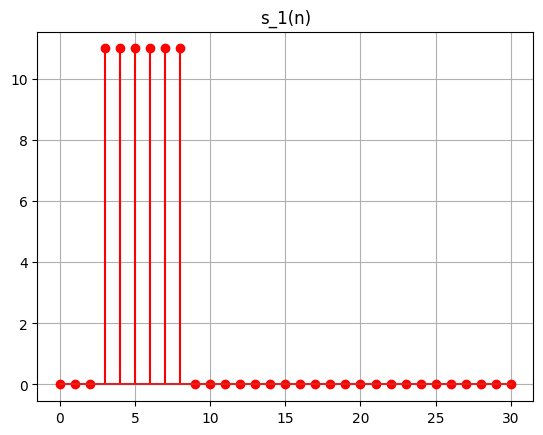

In [ ]:
# дискретный единичный скачок из л/р 1
def sigma_d(k):
  if k >= 0:
    return 1
  else:
    return 0

def s_1(k):
  return U * (sigma_d(k-(n0- 1)) - sigma_d(k - (n0 + n_imp - 1)))

n = [i for i in range(N)]
s_1_from_n = [s_1(i) for i in n]

plt.stem(n, s_1_from_n, 'ro')
plt.title("s_1(n)")
plt.grid()
plt.show()

Дискретный прямоугольный импульс был представлен как линейная комбинация двух дискретных единичных скачков с задержкой:
$s_1(k) = U \cdot (\sigma_d(k-n_0) - \sigma_d(k - (n_0 + n_{imp} - 1)))$

Дискретные единичные скачки имеют разные знаки в линейной комбинации, но одинаковую амплитуду, поэтому на отрезке $(n_0 + n_{imp} - 1; N - 1]$ значения гасят друг друга и дают $0$ в линейной комбинации, а на отрезке $[n_0; n_0 + n_{imp} - 1]$ значение линейной комбинации будет $U$.

---

#### 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k)$, $x_i(k) = B_i \cdot \sin( \hat {\omega_i} k), i=1,2,3$,с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N-1]$. Вычислить среднее значение (идентификатор $mean_{s_2}$), энергию (идентификатор $E$) и среднюю мощность последовательности $s_2(k)$ (идентификатор $P$). Пояснить:
* операции при моделировании линейной комбинации сигналов $s_2(k)$;
* как определяют указанные характеристики.

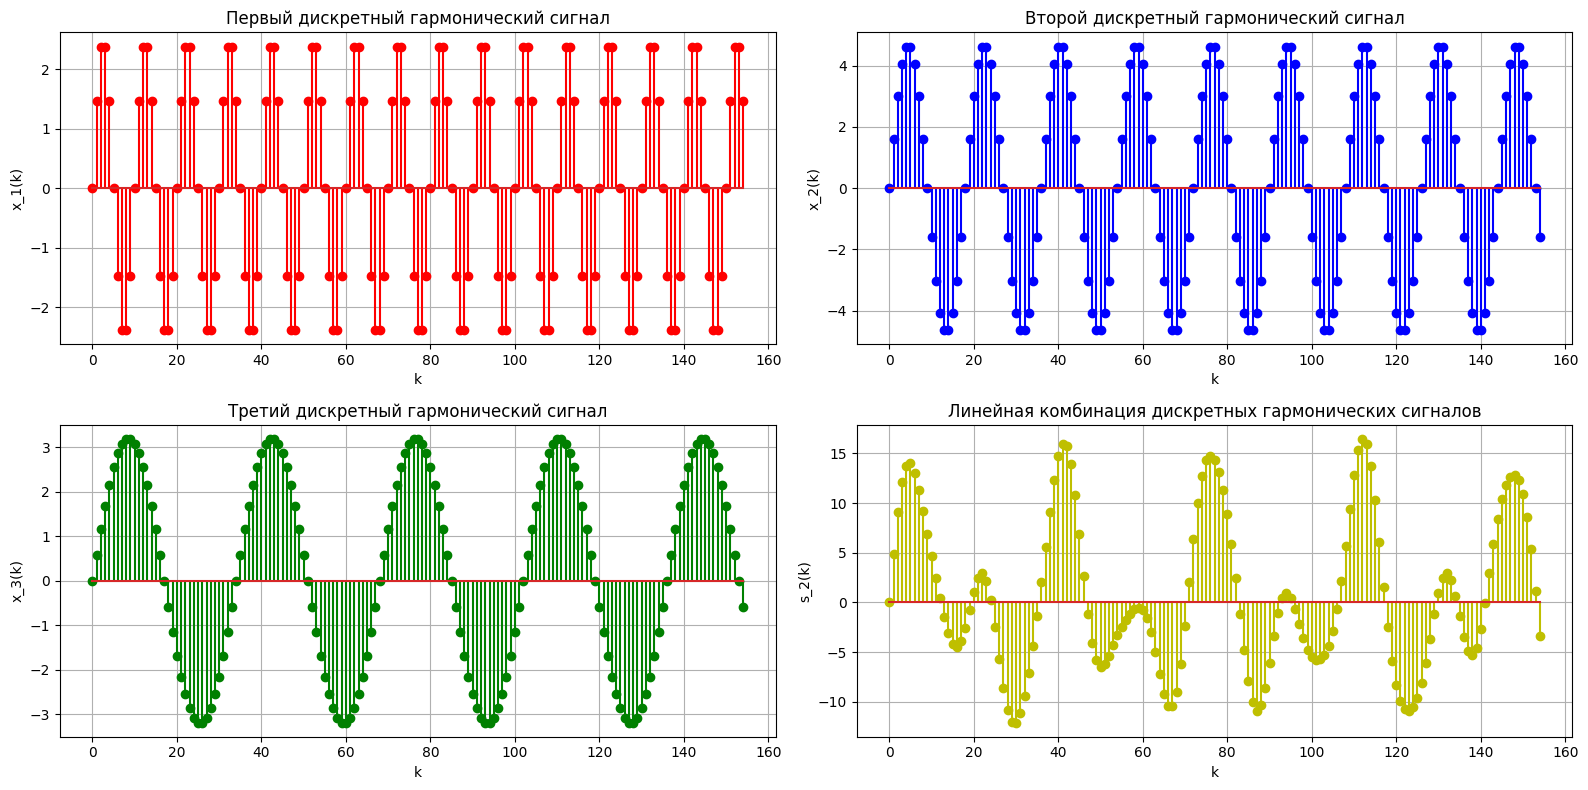

In [ ]:
def x_1(k):
  return B1 * math.sin(w1 * k)

def x_2(k):
  return B2 * math.sin(w2 * k)

def x_3(k):
  return B3 * math.sin(w3 * k)

def s_2(k):
  return a1 * x_1(k) + a2 * x_2(k) + a3 * x_3(k)

n = [i for i in range(5 * N)]
x_1_from_n = [x_1(i) for i in n]
x_2_from_n = [x_2(i) for i in n]
x_3_from_n = [x_3(i) for i in n]
s_2_from_n = [s_2(i) for i in n]

figure, axis = plt.subplots(2, 2, figsize=(16, 8))

axis[0][0].stem(n, x_1_from_n, 'ro')
axis[0][0].set_title("Первый дискретный гармонический сигнал")
axis[0][0].grid()
axis[0][0].set(xlabel='k', ylabel='x_1(k)')
axis[0][1].stem(n, x_2_from_n, 'bo')
axis[0][1].set_title("Второй дискретный гармонический сигнал")
axis[0][1].grid()
axis[0][1].set(xlabel='k', ylabel='x_2(k)')
axis[1][0].stem(n, x_3_from_n, 'go')
axis[1][0].set_title("Третий дискретный гармонический сигнал")
axis[1][0].grid()
axis[1][0].set(xlabel='k', ylabel='x_3(k)')
axis[1][1].stem(n, s_2_from_n, 'yo')
axis[1][1].set_title("Линейная комбинация дискретных гармонических сигналов")
axis[1][1].grid()
axis[1][1].set(xlabel='k', ylabel='s_2(k)')
plt.tight_layout()
plt.show()

Для моделирования линейной комбинации дискретных гармонических сигналов были написаны три гармонические функции функции для $x_1(k), x_2(k), x_3(k)$. В каждом отсчете суммировались амплитуды трех этих функций, умноженные на соответствующие коэффициенты $a_1, a_2, a_3$.

Вычислим среднее значение ,энергию и среднюю мощность последовательности $s_2(k)$ по следующим формулам:

* Среднее значение (идентификатор $mean\_s2$):<br>
$M = mean\_s2 = \frac {1} {5N} \sum_{0}^{5N-1} {s_2(k)}$;

* Энергия (идентификатор $E$):<br>
$E = \sum_{0}^{5N-1} {s_2^2(k)}$;

* Средняя мощность последовательности $s_2(k)$ (идентификатор $P$):<br>
$P = \frac 1 {5N} \sum_{0}^{5N-1} {s_2^2(k)}$.

In [ ]:
mean_s2 = sum(s_2_from_n) / (5 * N)
print ("Среднее значение =", mean_s2)
E = sum(i** 2 for i in s_2_from_n)
print ("Энергия =", E)
P = E / (5 * N)
print ("Средняя мощность =", P)

Среднее значение = 0.825142633586971
Энергия = 9493.592607246532
Средняя мощность = 61.24898456288085




---

#### 3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой *__дискретный гармонический сигнал $s(k)= C \cdot cos(\hat{\omega}_0 k)$, с экспоненциальной огибающей $|a|^k$__*, на интервале времени $n∈[0,N−1]$. Привести аналитическую формулу дискретного сигнала  $s_3(k)$ и пояснить операции при его моделировании.

*__Аналитическая формула:__* &emsp;&emsp;&emsp; $s_3(k)= C \cdot cos(\hat{\omega}_0 k) \cdot |a|^k = -2 \cdot cos(\frac{π}{7} \cdot k) \cdot 0.855^k$, где $k \in [0, N-1]$

*__Использованные операции при моделировании дискретного сигнала:__* <br>
Для получения дискретного сигнала $s_3(k)$ дискретный гармонический сигнал $s(k)= C \cdot cos(\hat{\omega}_0 k)$ был умножен на экспоненциальную составляющую $|a|^k$. Сигнал был смоделирован на интервале времени $n∈[0,N−1]$

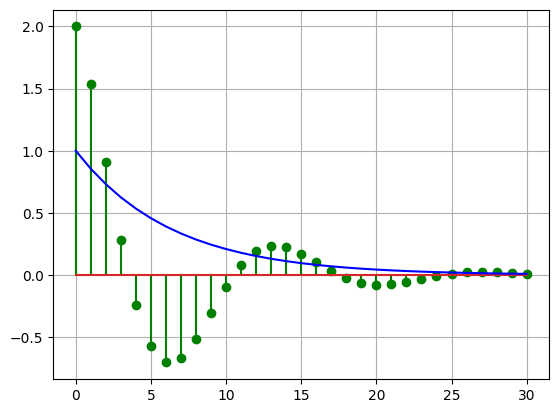

In [ ]:
def s_3(k):
  return C * math.cos(w0 * k) * (abs(a)**k)

n = [i for i in range(N)]
s_3_from_n = [s_3(i) for i in n]

plt.stem(n, s_3_from_n, 'go')
plt.plot([abs(a)**i for i in n], '-b')
plt.grid()
plt.show()

---

#### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

Представим периодическую последоватьность $s_4(k)$ как сумму по $i$: $s_1(k - i*T)$, где

$T = n\_imp * 2$ - период, <br>
$i$ - номер импульса ($1,2,3,4,5$). <br>
Длительность прямоугольного импульса $s_1(k)$ равна $n\_imp = 6$.

$s_4(k) = \sum_0^5 s_1(k-i*T)$

Длительность последовательности $n = T * 5$, так как необходимо смоделировать пять периодов дискретных прямоугольных импульсов.

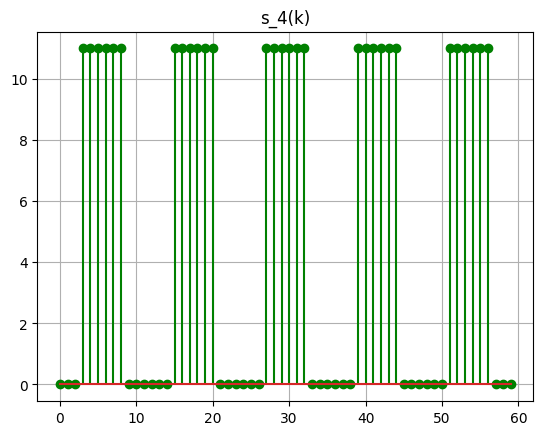

In [ ]:
T = n_imp * 2

def s_1_i(k, i):
  return s_1(k - (i * T))

def s_4(k):
  return sum(s_1_i(k, i) for i in range(5))

n = [i for i in range(T * 5)]
s_4_from_n = [s_4(i) for i in n]

plt.stem(n, s_4_from_n, 'go')
plt.title("s_4(k)")
plt.grid()
plt.show()

---

## Выводы

&emsp;В результате выполненной работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов, а также были освоены программные средства их моделирования.

&emsp;Был смоделирован дискретный прямоугольный импульс $s_1(k)$ на основе дискретного единичного скачка  $\sigma_d(k)$ из ЛР№1 с выводом графика на интервале времени $n \in [0, N-1]$.

&emsp;Также была смоделирована линейная комбинация дискретных гармонических сигналов $s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k)$ для $x_i(k) = B_i \cdot \sin( \hat {\omega_i} k), i=1,2,3$ с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N-1]$. Для последовательности $s_2(k)$ было вычислено среднее значение, энергия и средняя мощность последовательности.

&emsp;Был построен график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)= C \cdot cos(\hat{\omega}_0 k)$, с экспоненциальной огибающей $|a|^k$, на интервале времени $n∈[0,N−1]$. Была приведена аналитическая формула для $s_3(k)$ и пояснено, какие операции были использованы при моделировании сигнала.

&emsp;Также был построен график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса, а также пояснено, какие операции использовались при моделировании.